In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
import seaborn as sns
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [22]:
# Load the data from a CSV file into a pandas dataframe
data=pd.read_csv('/Users/anishreddy/Desktop/basic_updated.csv')

In [23]:
data.shape
data.head()

,patient_id,date_of_birth,medical_condition,co_morbidity,ethnicity,risk_factor,lmp,cycle_length,edd,number_of_babies,...,past_medical_history_11,pastPregnancy_Para,pastPregnancy_living,pastPregnancy_gravida,pastPregnancy_ectopics,pastPregnancy_has risk,pastPregnancy_premature,pastPregnancy_ab_induced,pastPregnancy_ab_spontaneous,pastPregnancy_multiple_births
0,6,30/01/1990,POSTPARTUM,diabetes,Mixed,LOW,1/6/22,28,8/3/23,1,...,NaN,1.0,1.0,1,NaN,No,NaN,NaN,NaN,NaN
1,7,22/10/1986,POSTPARTUM,obesity,Non Hispanic White,LOW,13/07/2021,28,19/04/2022,1,...,NaN,3.0,3.0,4,NaN,No,1.0,NaN,1.0,NaN
2,8,5/7/82,PREGNANCY,obesity,Hispanic and Latino,MEDIUM,23/07/2021,28,29/04/2022,1,...,NaN,0.0,NaN,1,NaN,Yes,NaN,NaN,NaN,NaN
3,9,6/12/83,PREGNANCY,NaN,Non Hispanic White,LOW,20/10/2021,28,27/07/2022,1,...,NaN,0.0,NaN,2,NaN,Yes,NaN,NaN,1.0,NaN
4,13,16/03/1996,POSTPARTUM,obesity,Hispanic and Latino,MEDIUM,30/09/2021,28,7/7/22,1,...,NaN,1.0,1.0,1,NaN,Yes,NaN,NaN,NaN,NaN


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   patient_id                     97 non-null     int64  
 1   date_of_birth                  97 non-null     object 
 2   medical_condition              97 non-null     object 
 3   co_morbidity                   57 non-null     object 
 4   ethnicity                      95 non-null     object 
 5   risk_factor                    97 non-null     object 
 6   lmp                            97 non-null     object 
 7   cycle_length                   97 non-null     int64  
 8   edd                            97 non-null     object 
 9   number_of_babies               97 non-null     int64  
 10  other checks                   14 non-null     object 
 11  infection_history              30 non-null     object 
 12  infection_history_1            7 non-null      objec

In [25]:
# One-hot encode the categorical column(s) in the dataframe
df_encoded = pd.get_dummies(data, columns=['medical_condition','co_morbidity','ethnicity','number_of_babies','other checks','infection_history','infection_history_1','past_medical_history','past_medical_history_1','past_medical_history_2','past_medical_history_3','past_medical_history_4','past_medical_history_5','past_medical_history_6','past_medical_history_7','past_medical_history_8','past_medical_history_9','past_medical_history_10','past_medical_history_11'])

# Write the encoded dataframe to a new CSV file
df_encoded.to_csv('/Users/anishreddy/Desktop/output.csv', index=False)

In [26]:
# Load the data from a CSV file into a pandas dataframe
df = pd.read_csv('/Users/anishreddy/Desktop/output.csv')

<Axes: xlabel='risk_factor', ylabel='count'>

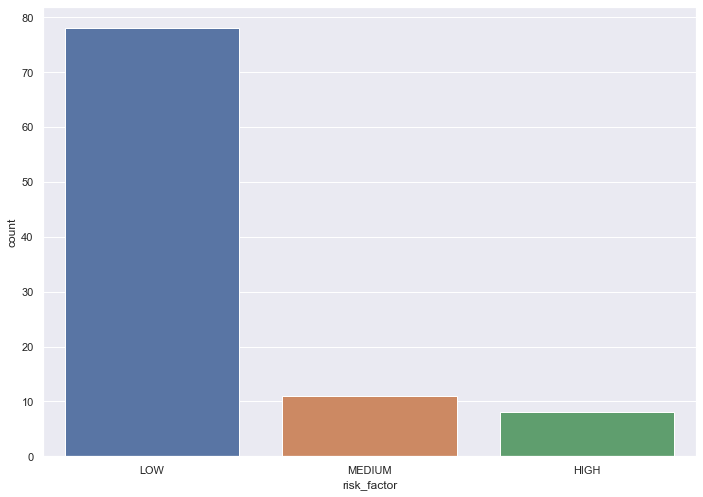

In [27]:
sns.countplot(x="risk_factor", data=df)

In [28]:
df.fillna(0, inplace=True)
df.isnull().sum()

patient_id                                            0
date_of_birth                                         0
risk_factor                                           0
lmp                                                   0
cycle_length                                          0
                                                     ..
past_medical_history_7_other_past_medical_history     0
past_medical_history_8_pulmonary_tb_asthma            0
past_medical_history_9_history_of_abnormal_pap        0
past_medical_history_10_operation_hospitalizations    0
past_medical_history_11_other_past_medical_history    0
Length: 124, dtype: int64

In [29]:
del df['date_of_birth']
del df['lmp']
del df['edd']
df.head()

,patient_id,risk_factor,cycle_length,pastPregnancy_Para,pastPregnancy_living,pastPregnancy_gravida,pastPregnancy_ectopics,pastPregnancy_has risk,pastPregnancy_premature,pastPregnancy_ab_induced,...,past_medical_history_6_drug_allergy_list,past_medical_history_6_operation_hospitalizations,past_medical_history_6_other_past_medical_history,past_medical_history_6_relevant_family_history,past_medical_history_7_neurologic_epilepsy,past_medical_history_7_other_past_medical_history,past_medical_history_8_pulmonary_tb_asthma,past_medical_history_9_history_of_abnormal_pap,past_medical_history_10_operation_hospitalizations,past_medical_history_11_other_past_medical_history
0,6,LOW,28,1.0,1.0,1,0.0,No,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,7,LOW,28,3.0,3.0,4,0.0,No,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,8,MEDIUM,28,0.0,0.0,1,0.0,Yes,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,9,LOW,28,0.0,0.0,2,0.0,Yes,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,13,MEDIUM,28,1.0,1.0,1,0.0,Yes,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# Select the categorical column(s) to encode
cat_cols = ['pastPregnancy_has risk']

# Create a LabelEncoder object and fit it to the categorical data
le = LabelEncoder()
df[cat_cols] = le.fit_transform(df[cat_cols])
#print(df)
cat_cols = ['risk_factor']

# Create a LabelEncoder object and fit it to the categorical data
le = LabelEncoder()
df[cat_cols] = le.fit_transform(df[cat_cols])
print(df)

    patient_id  risk_factor  cycle_length  pastPregnancy_Para  \
0            6            1            28                 1.0   
1            7            1            28                 3.0   
2            8            2            28                 0.0   
3            9            1            28                 0.0   
4           13            2            28                 1.0   
..         ...          ...           ...                 ...   
92         196            1            28                 1.0   
93         197            1            28                 1.0   
94         208            1            28                 1.0   
95         210            1            28                 2.0   
96         211            1            28                 0.0   

    pastPregnancy_living  pastPregnancy_gravida  pastPregnancy_ectopics  \
0                    1.0                      1                     0.0   
1                    3.0                      4                     0

/Users/anishreddy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


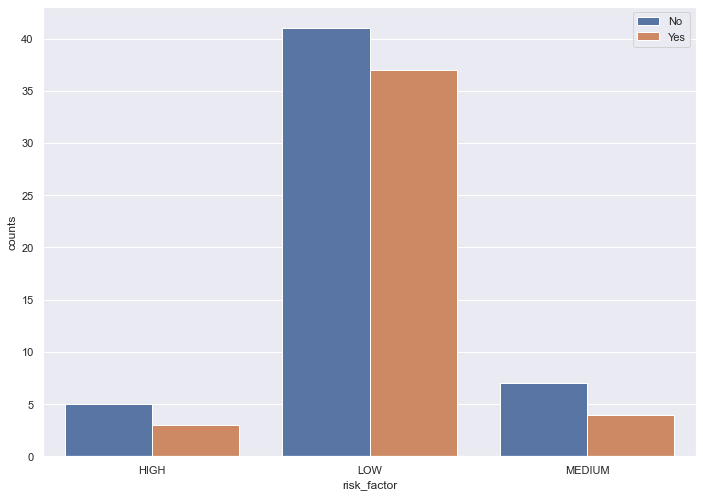

In [11]:
counts = data.groupby(['risk_factor', 'pastPregnancy_has risk']).size().reset_index(name='counts')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='risk_factor', y='counts', hue='pastPregnancy_has risk', data=counts)
plt.legend(loc='upper right')

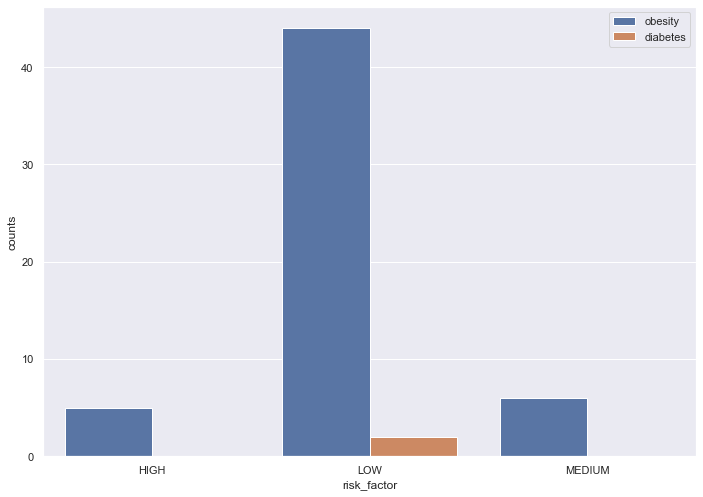

In [12]:
counts = data.groupby(['risk_factor', 'co_morbidity']).size().reset_index(name='counts')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='risk_factor', y='counts', hue='co_morbidity', data=counts)
plt.legend(loc='upper right')

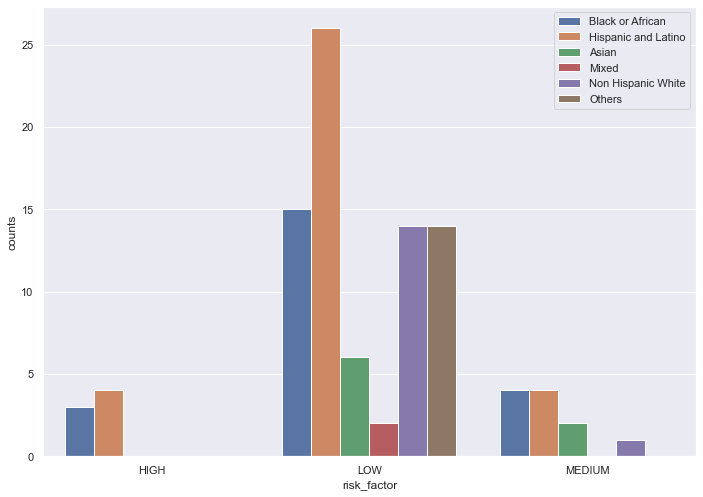

In [13]:
counts = data.groupby(['risk_factor', 'ethnicity']).size().reset_index(name='counts')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='risk_factor', y='counts', hue='ethnicity', data=counts)
plt.legend(loc='upper right')

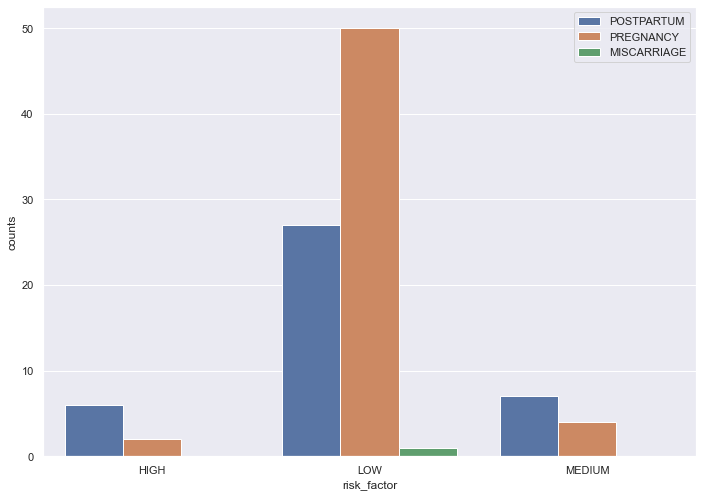

In [14]:
counts = data.groupby(['risk_factor', 'medical_condition']).size().reset_index(name='counts')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='risk_factor', y='counts', hue='medical_condition', data=counts)
plt.legend(loc='upper right')

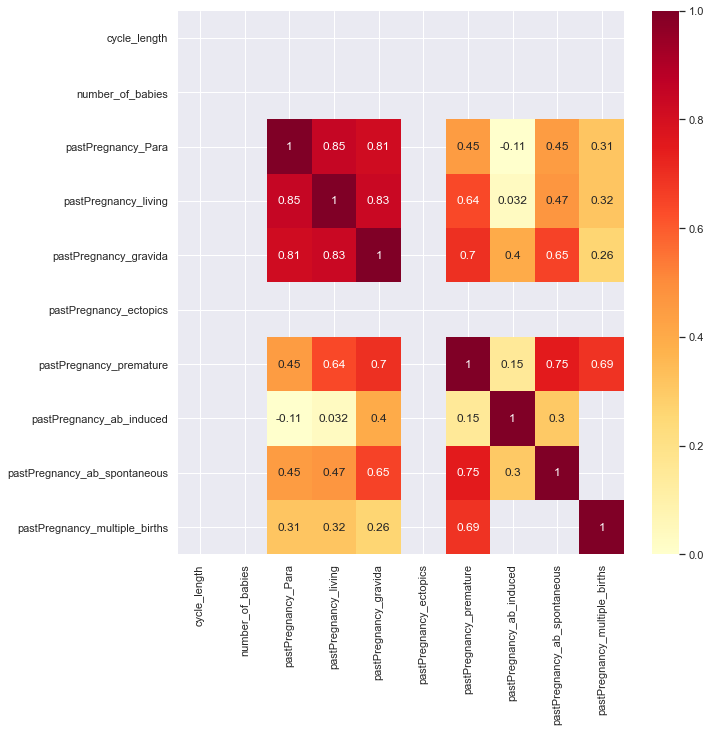

In [15]:
df=data.drop('patient_id',axis=1)
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='YlOrRd', vmin=0, vmax=1)
plt.show()

## Predicting the risk considering all the variables 

In [36]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('risk_factor', axis=1), df['risk_factor'], test_size=0.2)

# Create a logistic regression model and fit it to the training data
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = lr.predict(X_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy}')

linear_result=pd.DataFrame({'Id':test.index,'Predicted Risk':y_pred,'Actual Risk':y_test})
print(linear_result)

Logistic Regression Accuracy: 0.75
    Id  Predicted Risk  Actual Risk
0   82               2            1
68  57               1            1
47  25               1            1
75  95               1            1
56  71               1            1
63   6               1            1
41  59               1            0
72  86               1            1
55  74               1            1
79  35               1            1
45   0               1            1
83  65               1            1
2   41               2            2
28  46               1            0
11  94               1            1
5   88               2            2
27  78               0            1
15  58               1            1
1   29               2            1
73  51               1            1


/Users/anishreddy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

nb.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = nb.predict(X_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Naive Bayes Accuracy: {accuracy}')
linear_result=pd.DataFrame({'Id':test.index,'Predicted Risk':y_pred,'Actual Risk':y_test})
print(linear_result)

Naive Bayes Accuracy: 0.7
    Id  Predicted Risk  Actual Risk
0   82               1            1
68  57               1            1
47  25               1            1
75  95               1            1
56  71               1            1
63   6               0            1
41  59               1            0
72  86               1            1
55  74               1            1
79  35               1            1
45   0               1            1
83  65               1            1
2   41               1            2
28  46               1            0
11  94               2            1
5   88               1            2
27  78               1            1
15  58               1            1
1   29               1            1
73  51               1            1


In [38]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = tree.predict(X_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Decision Tree Accuracy: {accuracy}')
linear_result=pd.DataFrame({'Id':test.index,'Predicted Risk':y_pred,'Actual Risk':y_test})
print(linear_result)

Decision Tree Accuracy: 0.65
    Id  Predicted Risk  Actual Risk
0   82               2            1
68  57               1            1
47  25               1            1
75  95               1            1
56  71               1            1
63   6               1            1
41  59               1            0
72  86               1            1
55  74               1            1
79  35               1            1
45   0               1            1
83  65               1            1
2   41               1            2
28  46               1            0
11  94               2            1
5   88               0            2
27  78               1            1
15  58               1            1
1   29               2            1
73  51               1            1


In [40]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = lasso.predict(X_test)

# Calculate the mean squared error of the model
mse = mean_squared_error(y_test, y_pred)
print(f'Lasso RegressionMean Squared Error: {mse}')
linear_result=pd.DataFrame({'Id':test.index,'Predicted Risk':y_pred,'Actual Risk':y_test})
print(linear_result)

Lasso RegressionMean Squared Error: 0.19657434575237506
    Id  Predicted Risk  Actual Risk
0   82        1.164182            1
68  57        0.985883            1
47  25        1.056435            1
75  95        0.983844            1
56  71        1.037958            1
63   6        1.037718            1
41  59        1.057995            0
72  86        0.989363            1
55  74        1.048276            1
79  35        0.968847            1
45   0        1.068074            1
83  65        0.955649            1
2   41        1.161542            2
28  46        1.110308            0
11  94        1.109708            1
5   88        1.117627            2
27  78        1.111628            1
15  58        1.103109            1
1   29        1.135865            1
73  51        0.973765            1


In [42]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = lr.predict(X_test)

# Calculate the mean squared error of the model
mse = mean_squared_error(y_test, y_pred)
print(f'Linear Regression Mean Squared Error: {mse}')
linear_result=pd.DataFrame({'Id':test.index,'Predicted Risk':y_pred,'Actual Risk':y_test})
print(linear_result)

Linear Regression Mean Squared Error: 9.484316759006564
    Id  Predicted Risk  Actual Risk
0   82        3.448233            1
68  57       -0.191250            1
47  25        0.628860            1
75  95        4.588383            1
56  71        0.338537            1
63   6       -1.357921            1
41  59        3.344663            0
72  86        5.744336            1
55  74        2.606197            1
79  35        5.049453            1
45   0        5.202458            1
83  65        4.290149            1
2   41        0.574270            2
28  46        2.393689            0
11  94        1.776722            1
5   88       -0.608409            2
27  78       -0.132098            1
15  58        7.862670            1
1   29       -0.345941            1
73  51       -3.091906            1


In [43]:
from sklearn import svm
svc = svm.SVC(kernel='linear')
svc.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = svc.predict(X_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'SVM Accuracy: {accuracy}')
linear_result=pd.DataFrame({'Id':test.index,'Predicted Risk':y_pred,'Actual Risk':y_test})
print(linear_result)

SVM Accuracy: 0.65
    Id  Predicted Risk  Actual Risk
0   82               2            1
68  57               1            1
47  25               1            1
75  95               1            1
56  71               1            1
63   6               1            1
41  59               1            0
72  86               1            1
55  74               1            1
79  35               1            1
45   0               1            1
83  65               1            1
2   41               1            2
28  46               1            0
11  94               1            1
5   88               0            2
27  78               0            1
15  58               1            1
1   29               2            1
73  51               1            1


In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = knn.predict(X_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'KNN Accuracy: {accuracy}')
linear_result=pd.DataFrame({'Id':test.index,'Predicted Risk':y_pred,'Actual Risk':y_test})
print(linear_result)

KNN Accuracy: 0.8
    Id  Predicted Risk  Actual Risk
0   82               1            1
68  57               1            1
47  25               1            1
75  95               1            1
56  71               1            1
63   6               1            1
41  59               0            0
72  86               1            1
55  74               1            1
79  35               1            1
45   0               1            1
83  65               1            1
2   41               1            2
28  46               1            0
11  94               2            1
5   88               2            2
27  78               1            1
15  58               2            1
1   29               1            1
73  51               1            1


## Model tunning with K fold cross validation

In [45]:
#Model Tuning using logistic regression with K fold cross validation

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score

# Separate features and target variable
X = df.drop('risk_factor', axis=1)
y = df['risk_factor']

# Define k-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Define logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Perform k-fold cross-validation
scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

# Print accuracy score for each fold and average accuracy
for i, score in enumerate(scores):
    print(f"Fold {i+1}: {score}")
print(f"Average accuracy: {scores.mean()}")

# Fit the model on the entire dataset
model.fit(X, y)

# Predict target variable for new data
y_pred = model.predict(X)

# Print accuracy score on the entire dataset
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy on entire dataset: {accuracy}")

Fold 1: 0.8
Fold 2: 0.8
Fold 3: 0.8
Fold 4: 0.7
Fold 5: 0.7
Fold 6: 0.8
Fold 7: 0.9
Fold 8: 0.8888888888888888
Fold 9: 0.6666666666666666
Fold 10: 0.8888888888888888
Average accuracy: 0.7944444444444445
Accuracy on entire dataset: 0.9278350515463918


/Users/anishreddy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/anishreddy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
import pandas as pd


# Define the features and target variable
X = df.drop('risk_factor', axis=1)
y = df['risk_factor']

# Initialize the decision tree classifier
clf = DecisionTreeClassifier()

# Define the number of folds for cross-validation
k = 5

# Initialize the KFold object
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Compute the cross-validation scores
scores = cross_val_score(clf, X, y, cv=kf)

# Print the cross-validation scores and the mean and standard deviation
print(f'Cross-validation scores: {scores}')
print(f'Mean cross-validation score: {np.mean(scores)}')
print(f'Standard deviation of cross-validation scores: {np.std(scores)}')

Cross-validation scores: [0.8        0.75       0.63157895 0.84210526 0.68421053]
Mean cross-validation score: 0.741578947368421
Standard deviation of cross-validation scores: 0.07613226571997257


In [47]:
#Model Tuning for using Decision Tree with GridsearchCv

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Split the dataset into features (X) and target variable (y)
X = df.drop('risk_factor', axis=1)
y = df['risk_factor']

# Create a decision tree classifier object
tree = DecisionTreeClassifier()

# Define the parameter grid to search over
param_grid = {'max_depth': [3, 5, 7, None],
              'max_features': ['sqrt', 'log2', None]}

# Create a GridSearchCV object
grid_search = GridSearchCV(tree, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X, y)

# Print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'max_depth': 3, 'max_features': 'sqrt'}
Best score:  0.7936842105263159


In [48]:
#Model tuning using knn with K fold cross validation

from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

# Define the features and target variable
X = df.drop('risk_factor', axis=1)
y = df['risk_factor']

# Define the number of folds for cross-validation
k = 5

# Initialize the KNN classifier
clf = KNeighborsClassifier(n_neighbors=5)

# Initialize the k-fold cross-validator
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize an empty list to store the accuracy scores for each fold
accuracy_scores = []

# Loop over the folds
for train_index, test_index in kf.split(X):
    # Split the data into training and testing sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the classifier on the training data
    clf.fit(X_train, y_train)
    
    # Predict the target variable for the testing data
    y_pred = clf.predict(X_test)
    
    # Compute the accuracy score for this fold and append it to the list
    accuracy_scores.append(accuracy_score(y_test, y_pred))

# Compute the mean and standard deviation of the accuracy scores across all folds
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)

# Print the mean and standard deviation of the accuracy scores
print(f'Mean accuracy: {mean_accuracy}')
print(f'Standard deviation of accuracy: {std_accuracy}')

Mean accuracy: 0.8152631578947368
Standard deviation of accuracy: 0.09532565556773412


In [49]:
#Model Tuning using KNN with GridsearchCv

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd


# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('risk_factor', axis=1), df['risk_factor'], test_size=0.2, random_state=42)

# define parameter grid for tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # number of neighbors to consider
    'weights': ['uniform', 'distance'],  # weighting strategy
    'p': [1, 2]  # distance metric (1 = Manhattan distance, 2 = Euclidean distance)
}

# create KNN classifier object
knn = KNeighborsClassifier()

# use grid search to find the best hyperparameters
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# get the best hyperparameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# fit the KNN classifier on the training data with the best hyperparameters
knn = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], weights=best_params['weights'], p=best_params['p'])
knn.fit(X_train, y_train)

# predict on the test data and calculate accuracy score
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# print the best hyperparameters, score, and accuracy
print('Best hyperparameters:', best_params)
print('Best score:', best_score)
print('Accuracy:', accuracy)

Best hyperparameters: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Best score: 0.845
Accuracy: 0.75


In [50]:
#Model Tuning using SVm with K fold cross validation

from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd


# Define the features and target variable
X = df.drop('risk_factor', axis=1)
y = df['risk_factor']

# Initialize the SVM classifier
clf = SVC(kernel='linear')

# Define the number of folds for k-fold cross-validation
n_folds = 5

# Initialize the KFold object
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Initialize a list to store the accuracy scores
accuracy_scores = []

# Loop over each fold
for train_index, test_index in kf.split(X):
    # Split the data into training and testing sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the classifier on the training data
    clf.fit(X_train, y_train)

    # Predict the target variable on the testing data
    y_pred = clf.predict(X_test)

    # Compute the accuracy score for this fold
    accuracy = accuracy_score(y_test, y_pred)

    # Append the accuracy score to the list
    accuracy_scores.append(accuracy)

# Compute the mean and standard deviation of the accuracy scores
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)

# Print the mean and standard deviation of the accuracy scores
print(f'Mean accuracy: {mean_accuracy:.3f}')
print(f'Standard deviation of accuracy: {std_accuracy:.3f}')

Mean accuracy: 0.742
Standard deviation of accuracy: 0.046


In [51]:
#Model Tuning using SVM with GridsearchCv


from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('risk_factor', axis=1), df['risk_factor'], test_size=0.2, random_state=45)

# define parameter grid for tuning
param_grid = {
    'C': [0.1, 1, 10],  # regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # kernel function
    'gamma': ['scale', 'auto']  # kernel coefficient (if applicable)
}

# create SVM classifier object
svm = SVC()

# use grid search to find the best hyperparameters
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# get the best hyperparameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# fit the SVM classifier on the training data with the best hyperparameters
svm = SVC(C=best_params['C'], kernel=best_params['kernel'], gamma=best_params['gamma'])
svm.fit(X_train, y_train)

# predict on the test data and calculate accuracy score
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# print the best hyperparameters, score, and accuracy
print('Best hyperparameters:', best_params)
print('Best score:', best_score)
print('Accuracy:', accuracy)

Best hyperparameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best score: 0.8183333333333334
Accuracy: 0.85


# Gestational Diabetes

In [31]:
selected_cols = ['patient_id','risk_factor','medical_condition_MISCARRIAGE','co_morbidity_diabetes','co_morbidity_obesity','past_medical_history_diabetes','past_medical_history_hypertension','past_medical_history_obesity','past_medical_history_1_diabetes','past_medical_history_1_hypertension','past_medical_history_1_infertility','past_medical_history_1_obesity','past_medical_history_2_hypertension','past_medical_history_3_diabetes','past_medical_history_3_hypertension','past_medical_history_4_hypertension','past_medical_history_4_psychiatric']
df1 = df[selected_cols]
train, test = train_test_split(df1, test_size=0.2, random_state=25)
y_test=test['risk_factor']
x_test=test.drop('risk_factor', axis=1)
x_test.head()
x_train=train.drop('risk_factor',axis=1)
y_train=train['risk_factor']
lr = LogisticRegression()
lr.fit(x_train, y_train)

# Predict the target variable for the test data
logestic_pred = lr.predict(x_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, logestic_pred)
print(f'Logistic Regression Accuracy: {accuracy}')

linear_result=pd.DataFrame({'Id':test.index,'Predicted Risk':logestic_pred,'Actual Risk':y_test})
print(linear_result)

tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

# Predict the target variable for the test data
y_pred = tree.predict(x_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Decision Tree Accuracy: {accuracy}')
linear_result=pd.DataFrame({'Id':test.index,'Predicted Risk':y_pred,'Actual Risk':y_test})
print(linear_result)

svc = svm.SVC(kernel='linear')
svc.fit(x_train, y_train)

# Predict the target variable for the test data
svm_pred = svc.predict(x_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, svm_pred)
print(f'SVM Accuracy: {accuracy}')
linear_result=pd.DataFrame({'Id':test.index,'Predicted Risk':y_pred,'Actual Risk':y_test})
print(linear_result)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

# Predict the target variable for the test data
knn_pred = knn.predict(x_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, knn_pred)
print(f'KNN Accuracy: {accuracy}')
linear_result=pd.DataFrame({'Id':test.index,'Predicted Risk':y_pred,'Actual Risk':y_test})
print(linear_result)

Logistic Regression Accuracy: 0.9
    Id  Predicted Risk  Actual Risk
82  82               1            1
57  57               1            1
25  25               1            1
95  95               1            1
71  71               1            1
6    6               2            2
59  59               1            1
86  86               1            1
74  74               1            1
35  35               1            1
0    0               2            1
65  65               1            1
41  41               1            0
46  46               1            1
94  94               1            1
88  88               1            1
78  78               1            1
58  58               1            1
29  29               1            1
51  51               1            1
Decision Tree Accuracy: 0.9
    Id  Predicted Risk  Actual Risk
82  82               1            1
57  57               1            1
25  25               1            1
95  95               1            1
71

/Users/anishreddy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Pre-Eclampsia

In [32]:
selected_cols = ['patient_id','risk_factor','medical_condition_MISCARRIAGE','co_morbidity_diabetes','co_morbidity_obesity','past_medical_history_diabetes','past_medical_history_hypertension','past_medical_history_obesity','past_medical_history_thyroid','past_medical_history_1_diabetes','past_medical_history_1_hypertension','past_medical_history_1_obesity','past_medical_history_1_thyroid','past_medical_history_2_hypertension','past_medical_history_2_relevant_family_history','past_medical_history_3_diabetes','past_medical_history_3_hypertension','past_medical_history_3_neurologic_epilepsy','past_medical_history_4_hypertension','past_medical_history_4_kidney_disease_uti','past_medical_history_7_neurologic_epilepsy']
df1 = df[selected_cols]
train, test = train_test_split(df1, test_size=0.2, random_state=25)
y_test=test['risk_factor']
x_test=test.drop('risk_factor', axis=1)
x_test.head()
x_train=train.drop('risk_factor',axis=1)
y_train=train['risk_factor']
lr = LogisticRegression()
lr.fit(x_train, y_train)

# Predict the target variable for the test data
logestic_pred = lr.predict(x_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, logestic_pred)
print(f'Logistic Regression Accuracy: {accuracy}')

linear_result=pd.DataFrame({'Id':test.index,'Predicted Risk':logestic_pred,'Actual Risk':y_test})
print(linear_result)

tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

# Predict the target variable for the test data
y_pred = tree.predict(x_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Decision Tree Accuracy: {accuracy}')
linear_result=pd.DataFrame({'Id':test.index,'Predicted Risk':y_pred,'Actual Risk':y_test})
print(linear_result)

svc = svm.SVC(kernel='linear')
svc.fit(x_train, y_train)

# Predict the target variable for the test data
svm_pred = svc.predict(x_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, svm_pred)
print(f'SVM Accuracy: {accuracy}')
linear_result=pd.DataFrame({'Id':test.index,'Predicted Risk':y_pred,'Actual Risk':y_test})
print(linear_result)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

# Predict the target variable for the test data
knn_pred = knn.predict(x_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, knn_pred)
print(f'KNN Accuracy: {accuracy}')
linear_result=pd.DataFrame({'Id':test.index,'Predicted Risk':y_pred,'Actual Risk':y_test})
print(linear_result)

Logistic Regression Accuracy: 0.9
    Id  Predicted Risk  Actual Risk
82  82               1            1
57  57               1            1
25  25               1            1
95  95               1            1
71  71               1            1
6    6               2            2
59  59               1            1
86  86               1            1
74  74               1            1
35  35               1            1
0    0               2            1
65  65               1            1
41  41               1            0
46  46               1            1
94  94               1            1
88  88               1            1
78  78               1            1
58  58               1            1
29  29               1            1
51  51               1            1
Decision Tree Accuracy: 0.9
    Id  Predicted Risk  Actual Risk
82  82               1            1
57  57               1            1
25  25               1            1
95  95               1            1
71

# Pre-term

In [33]:
selected_cols = ['patient_id','risk_factor','medical_condition_MISCARRIAGE','pastPregnancy_premature','past_medical_history_alcohol','past_medical_history_gyn_surgery','past_medical_history_psychiatric','past_medical_history_thyroid','past_medical_history_tobacco','past_medical_history_1_gyn_surgery','past_medical_history_1_psychiatric','past_medical_history_1_pulmonary_tb_asthma','past_medical_history_1_street_drugs','past_medical_history_1_thyroid','past_medical_history_1_tobacco','past_medical_history_2_gyn_surgery','past_medical_history_2_psychiatric','past_medical_history_2_pulmonary_tb_asthma','past_medical_history_2_street_drugs','past_medical_history_2_tobacco','past_medical_history_3_neurologic_epilepsy','past_medical_history_3_psychiatric','past_medical_history_3_pulmonary_tb_asthma','past_medical_history_3_street_drugs','past_medical_history_4_psychiatric','past_medical_history_4_pulmonary_tb_asthma','past_medical_history_5_street_drugs','past_medical_history_7_neurologic_epilepsy','past_medical_history_8_pulmonary_tb_asthma']
df1 = df[selected_cols]
train, test = train_test_split(df1, test_size=0.2, random_state=25)
y_test=test['risk_factor']
x_test=test.drop('risk_factor', axis=1)
x_test.head()
x_train=train.drop('risk_factor',axis=1)
y_train=train['risk_factor']
lr = LogisticRegression()
lr.fit(x_train, y_train)

# Predict the target variable for the test data
logestic_pred = lr.predict(x_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, logestic_pred)
print(f'Logistic Regression Accuracy: {accuracy}')

linear_result=pd.DataFrame({'Id':test.index,'Predicted Risk':logestic_pred,'Actual Risk':y_test})
print(linear_result)

tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

# Predict the target variable for the test data
y_pred = tree.predict(x_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Decision Tree Accuracy: {accuracy}')
linear_result=pd.DataFrame({'Id':test.index,'Predicted Risk':y_pred,'Actual Risk':y_test})
print(linear_result)

svc = svm.SVC(kernel='linear')
svc.fit(x_train, y_train)

# Predict the target variable for the test data
svm_pred = svc.predict(x_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, svm_pred)
print(f'SVM Accuracy: {accuracy}')
linear_result=pd.DataFrame({'Id':test.index,'Predicted Risk':y_pred,'Actual Risk':y_test})
print(linear_result)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

# Predict the target variable for the test data
knn_pred = knn.predict(x_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, knn_pred)
print(f'KNN Accuracy: {accuracy}')
linear_result=pd.DataFrame({'Id':test.index,'Predicted Risk':y_pred,'Actual Risk':y_test})
print(linear_result)

Logistic Regression Accuracy: 0.9
    Id  Predicted Risk  Actual Risk
82  82               1            1
57  57               1            1
25  25               1            1
95  95               1            1
71  71               1            1
6    6               2            2
59  59               1            1
86  86               1            1
74  74               1            1
35  35               1            1
0    0               2            1
65  65               1            1
41  41               1            0
46  46               1            1
94  94               1            1
88  88               1            1
78  78               1            1
58  58               1            1
29  29               1            1
51  51               1            1
Decision Tree Accuracy: 0.8
    Id  Predicted Risk  Actual Risk
82  82               1            1
57  57               1            1
25  25               2            1
95  95               0            1
71

/Users/anishreddy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# C-Section

In [34]:
selected_cols = ['patient_id','risk_factor','co_morbidity_diabetes','past_medical_history_diabetes','past_medical_history_1_diabetes','past_medical_history_1_infertility','past_medical_history_2_history_of_blood_transfs','past_medical_history_2_uterine_anomaly','past_medical_history_3_advanced_maternal_age','past_medical_history_allergies','past_medical_history_history_of_blood_transfs','past_medical_history_1_allergies','past_medical_history_1_relevant_family_history']
df1 = df[selected_cols]
train, test = train_test_split(df1, test_size=0.2, random_state=25)
y_test=test['risk_factor']
x_test=test.drop('risk_factor', axis=1)
x_test.head()
x_train=train.drop('risk_factor',axis=1)
y_train=train['risk_factor']
lr = LogisticRegression()
lr.fit(x_train, y_train)

# Predict the target variable for the test data
logestic_pred = lr.predict(x_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, logestic_pred)
print(f'Logistic Regression Accuracy: {accuracy}')

linear_result=pd.DataFrame({'Id':test.index,'Predicted Risk':logestic_pred,'Actual Risk':y_test})
print(linear_result)

tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

# Predict the target variable for the test data
y_pred = tree.predict(x_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Decision Tree Accuracy: {accuracy}')
linear_result=pd.DataFrame({'Id':test.index,'Predicted Risk':y_pred,'Actual Risk':y_test})
print(linear_result)

svc = svm.SVC(kernel='linear')
svc.fit(x_train, y_train)

# Predict the target variable for the test data
svm_pred = svc.predict(x_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, svm_pred)
print(f'SVM Accuracy: {accuracy}')
linear_result=pd.DataFrame({'Id':test.index,'Predicted Risk':y_pred,'Actual Risk':y_test})
print(linear_result)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

# Predict the target variable for the test data
knn_pred = knn.predict(x_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, knn_pred)
print(f'KNN Accuracy: {accuracy}')
linear_result=pd.DataFrame({'Id':test.index,'Predicted Risk':y_pred,'Actual Risk':y_test})
print(linear_result)

Logistic Regression Accuracy: 0.9
    Id  Predicted Risk  Actual Risk
82  82               1            1
57  57               1            1
25  25               1            1
95  95               1            1
71  71               1            1
6    6               2            2
59  59               1            1
86  86               1            1
74  74               1            1
35  35               1            1
0    0               2            1
65  65               1            1
41  41               1            0
46  46               1            1
94  94               1            1
88  88               1            1
78  78               1            1
58  58               1            1
29  29               1            1
51  51               1            1
Decision Tree Accuracy: 1.0
    Id  Predicted Risk  Actual Risk
82  82               1            1
57  57               1            1
25  25               1            1
95  95               1            1
71

# Ideal weight

In [35]:
selected_cols = ['patient_id','risk_factor','medical_condition_MISCARRIAGE','pastPregnancy_has risk','co_morbidity_diabetes','co_morbidity_obesity','past_medical_history_diabetes','past_medical_history_obesity','past_medical_history_thyroid','past_medical_history_1_diabetes','past_medical_history_1_obesity','past_medical_history_1_thyroid','past_medical_history_2_hepatitis_liver_disease','past_medical_history_3_diabetes','past_medical_history_3_heart_disease','past_medical_history_4_hepatitis_liver_disease','past_medical_history_4_kidney_disease_uti','past_medical_history_5_heart_disease']
df1 = df[selected_cols]
train, test = train_test_split(df1, test_size=0.2, random_state=25)
y_test=test['risk_factor']
x_test=test.drop('risk_factor', axis=1)
x_test.head()
x_train=train.drop('risk_factor',axis=1)
y_train=train['risk_factor']
lr = LogisticRegression()
lr.fit(x_train, y_train)

# Predict the target variable for the test data
logestic_pred = lr.predict(x_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, logestic_pred)
print(f'Logistic Regression Accuracy: {accuracy}')

linear_result=pd.DataFrame({'Id':test.index,'Predicted Risk':logestic_pred,'Actual Risk':y_test})
print(linear_result)

tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

# Predict the target variable for the test data
y_pred = tree.predict(x_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Decision Tree Accuracy: {accuracy}')
linear_result=pd.DataFrame({'Id':test.index,'Predicted Risk':y_pred,'Actual Risk':y_test})
print(linear_result)

svc = svm.SVC(kernel='linear')
svc.fit(x_train, y_train)

# Predict the target variable for the test data
svm_pred = svc.predict(x_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, svm_pred)
print(f'SVM Accuracy: {accuracy}')
linear_result=pd.DataFrame({'Id':test.index,'Predicted Risk':y_pred,'Actual Risk':y_test})
print(linear_result)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

# Predict the target variable for the test data
knn_pred = knn.predict(x_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, knn_pred)
print(f'KNN Accuracy: {accuracy}')
linear_result=pd.DataFrame({'Id':test.index,'Predicted Risk':y_pred,'Actual Risk':y_test})
print(linear_result)

Logistic Regression Accuracy: 0.9
    Id  Predicted Risk  Actual Risk
82  82               1            1
57  57               1            1
25  25               1            1
95  95               1            1
71  71               1            1
6    6               2            2
59  59               1            1
86  86               1            1
74  74               1            1
35  35               1            1
0    0               2            1
65  65               1            1
41  41               1            0
46  46               1            1
94  94               1            1
88  88               1            1
78  78               1            1
58  58               1            1
29  29               1            1
51  51               1            1
Decision Tree Accuracy: 0.95
    Id  Predicted Risk  Actual Risk
82  82               1            1
57  57               1            1
25  25               1            1
95  95               1            1
7

/Users/anishreddy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
